In [1]:
import flowsom as fs
import pytometry as pm
import scanpy as sc
import csv 
import numpy as np
import matplotlib.pyplot as plt

/home/fdotta/dev/omnis_microservices_platform/pipeline_microservice/metabolomics_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ff = fs.io.read_FCS("/media/datastorage/it_cast/omnis_microservice_db/flow_cytometry/project_13/Spleenocytes_Tcells_Rag2KO_005.fcs")
print(ff)

AnnData object with n_obs × n_vars = 96476 × 19
    var: 'n', 'channel', 'marker', '$PnR', '$PnB', '$PnE', '$PnV', '$PnG'
    uns: 'meta'


In [3]:
ff.var

,n,channel,marker,$PnR,$PnB,$PnE,$PnV,$PnG
FSC-A,1,FSC-A,,262144,32,"0,0",541,1.0
FSC-H,2,FSC-H,,262144,32,"0,0",541,1.0
FSC-W,3,FSC-W,,262144,32,"0,0",541,1.0
SSC-A,4,SSC-A,,262144,32,"0,0",340,1.0
SSC-H,5,SSC-H,,262144,32,"0,0",340,1.0
SSC-W,6,SSC-W,,262144,32,"0,0",340,1.0
BV421-A,7,BV421-A,,262144,32,"0,0",412,1.0
BV510-A,8,BV510-A,,262144,32,"0,0",456,1.0
BV605-A,9,BV605-A,,262144,32,"0,0",505,1.0
BV650-A,10,BV650-A,,262144,32,"0,0",595,1.0


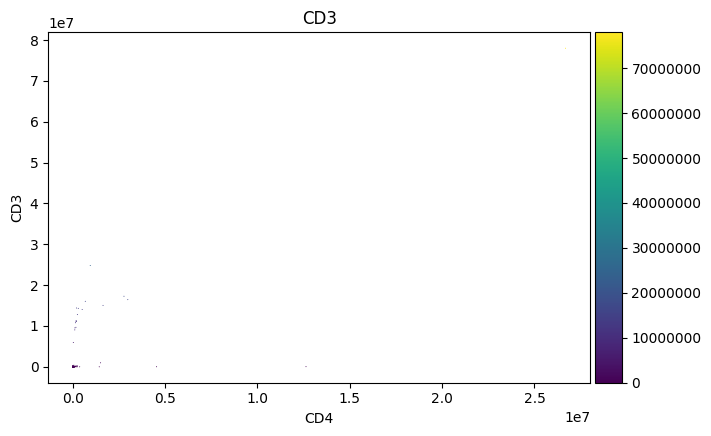

In [6]:
sc.pl.scatter(ff, x="CD4", y="CD3", color="CD3", size=2)


In [20]:
ff_comp = pm.pp.compensate(ff, inplace=False)

cols_to_use = [10, 12, 14, 15, 16, 17]
colnames_to_use = ff_comp[:, cols_to_use].var_names.tolist()
colnames_to_use

['CD4', 'CD8', 'Live/Dead', 'CD3', 'APC-R700-A', 'CD45']

In [21]:
ff_t = pm.tl.normalize_autologicle(ff_comp, channels=colnames_to_use, inplace=False)


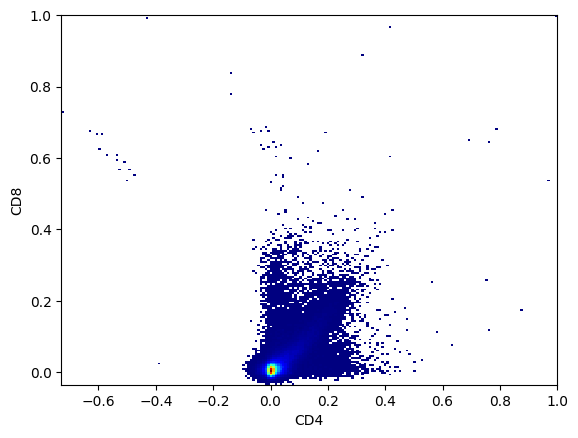

In [22]:
# Visualize data
ax = plt.hist2d(ff_t[:, "CD4"].X.flatten(), ff_t[:, "CD8"].X.flatten(), bins=200, cmin=1, cmap="jet")
plt.xlabel("CD4")
plt.ylabel("CD8")
plt.show()

In [23]:
fsom = fs.FlowSOM(ff_t.copy(), cols_to_use=cols_to_use, n_clusters=10, xdim=10, ydim=10, seed=42)

ff_clustered = fs.flowsom_clustering(ff_t, cols_to_use, xdim=10, ydim=10, n_clusters=10, seed=42)


2025-09-16 10:46:32.848 | DEBUG    | flowsom.main:__init__:84 - Reading input.
2025-09-16 10:46:32.853 | DEBUG    | flowsom.main:__init__:86 - Fitting model: clustering and metaclustering.
2025-09-16 10:46:36.295 | DEBUG    | flowsom.main:__init__:88 - Updating derived values.
2025-09-16 10:46:37.849 | DEBUG    | flowsom.main:__init__:84 - Reading input.
2025-09-16 10:46:37.856 | DEBUG    | flowsom.main:__init__:86 - Fitting model: clustering and metaclustering.
2025-09-16 10:46:41.074 | DEBUG    | flowsom.main:__init__:88 - Updating derived values.


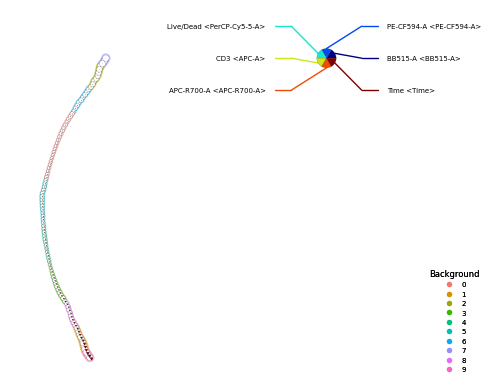

In [18]:

p = fs.pl.plot_stars(fsom, background_values=fsom.get_cluster_data().obs.metaclustering)


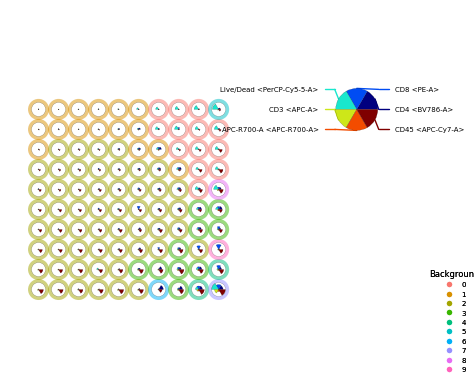

In [25]:
p = fs.pl.plot_stars(
    fsom,
    background_values=fsom.get_cluster_data().obs.metaclustering,
    view="grid",
    equal_node_size=True,
    equal_background_size=True,
)

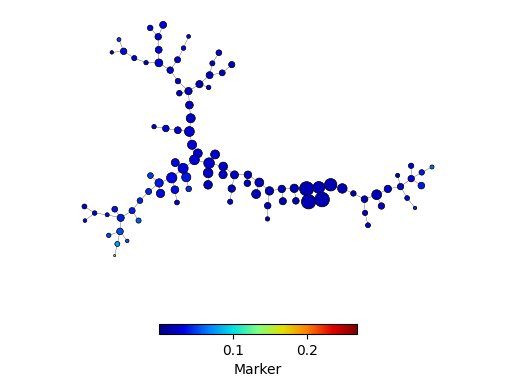

In [29]:
p = fs.pl.plot_marker(fsom, marker=np.array(["CD3"]))


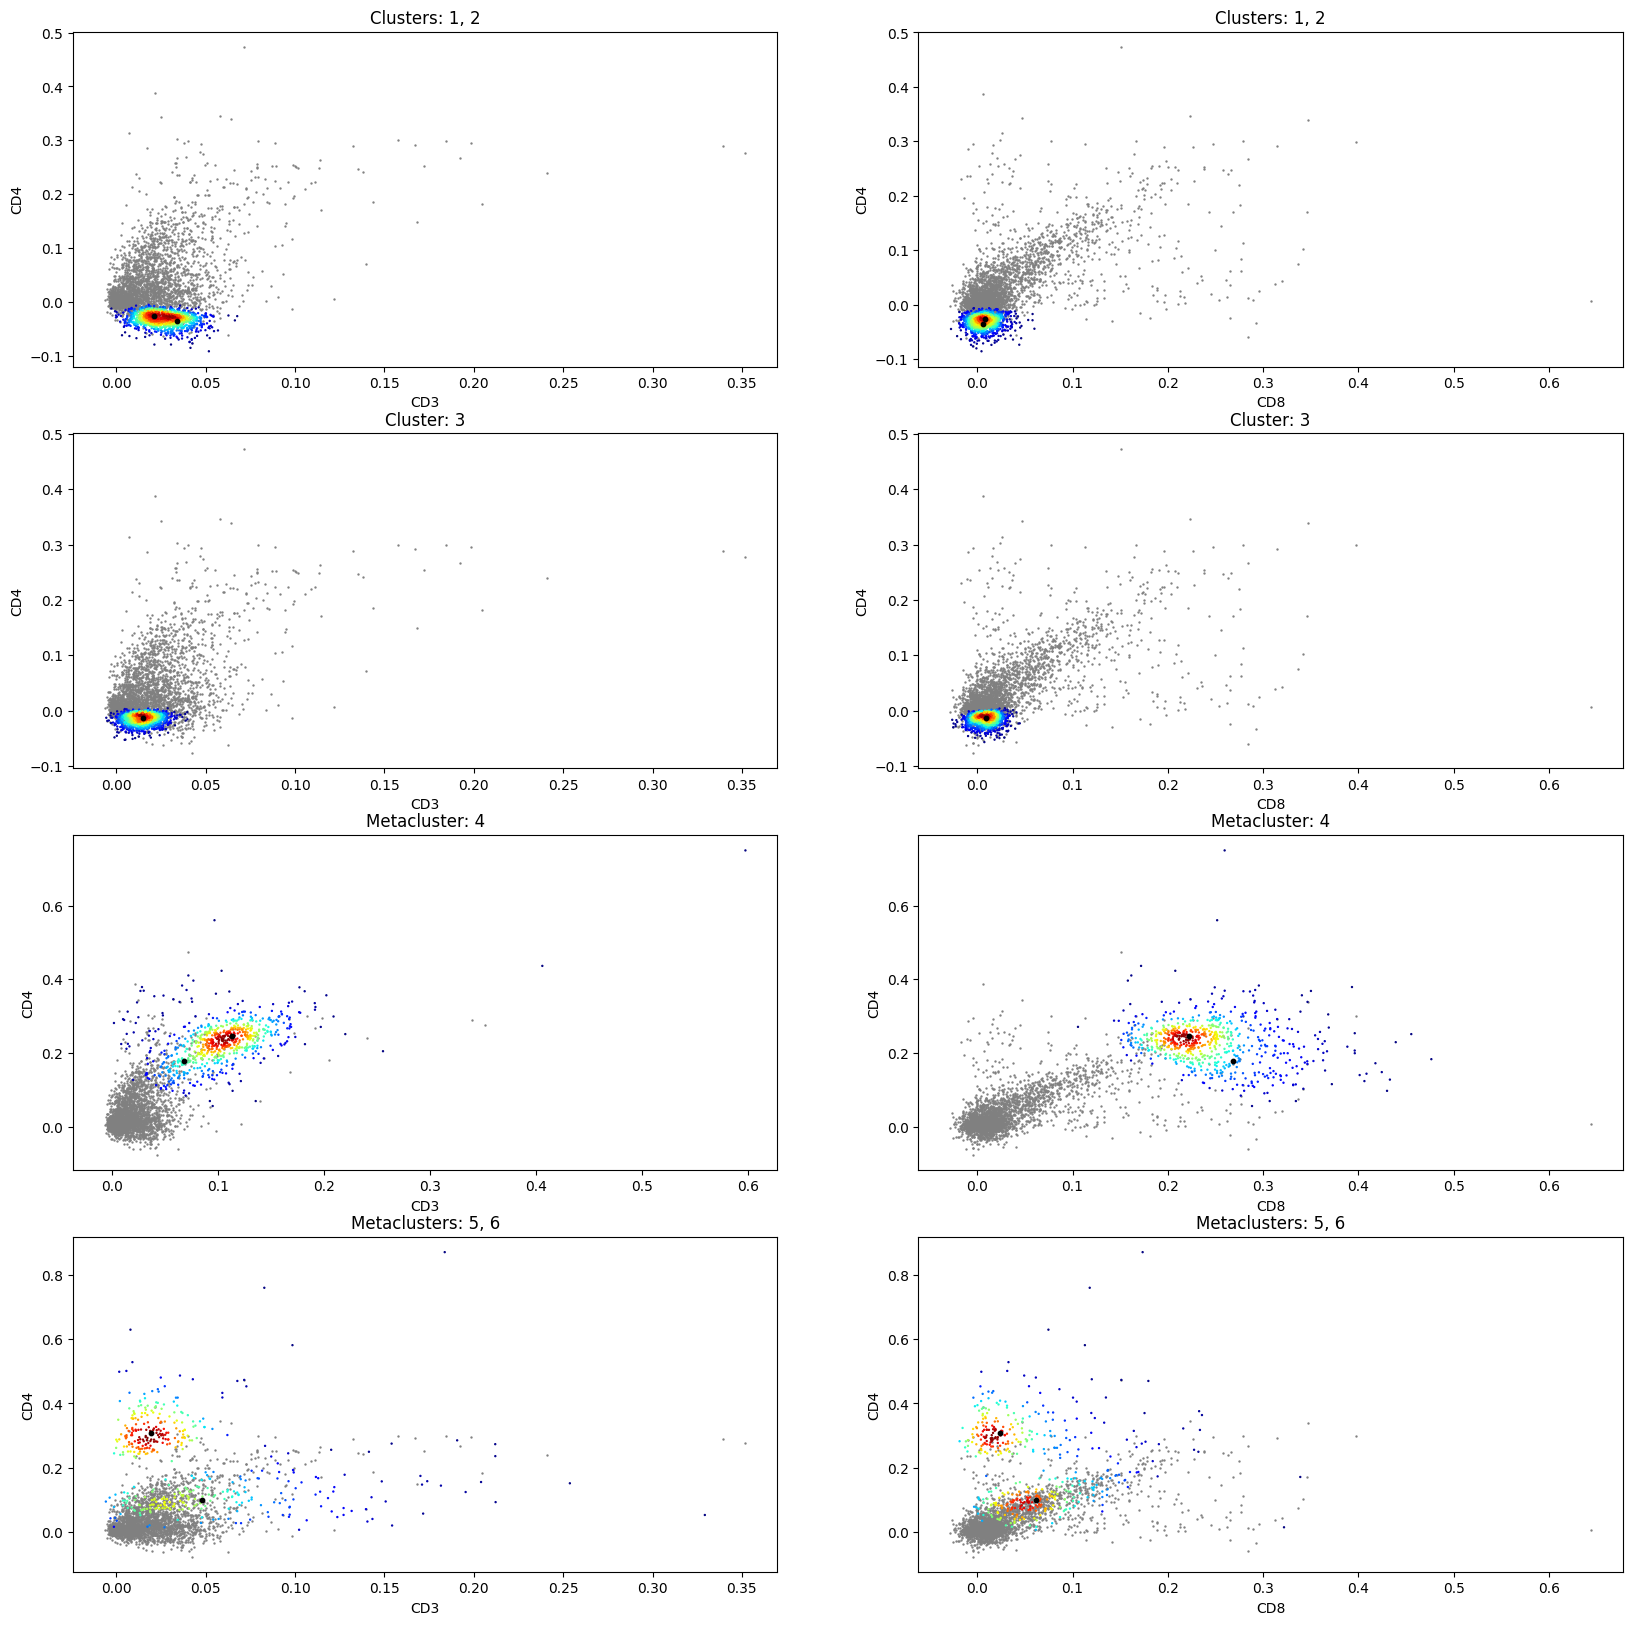

In [34]:
p = fs.pl.plot_2D_scatters(
    fsom,
    channelpairs=[["CD3", "CD4"], ["CD8", "CD4"]],
    clusters=[[1, 2], [3]],
    metaclusters=[[4], [5, 6]],
    density=True,
    centers=True,
)
p.figure.set_size_inches(20, 20)  # Resize the figure
plt.show()  # Force display

In [33]:
features = fs.tl.get_features(
    fsom,
    files=[ff_t[1:1000, :], ff_t[1000:2000, :]],
    level=["clusters", "metaclusters"],
    type=["counts", "percentages"],
)
features["metacluster_percentages"]

/home/fdotta/dev/omnis_microservices_platform/pipeline_microservice/metabolomics_env/lib/python3.12/site-packages/flowsom/main.py:166: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["pretty_colnames"] = np.asarray(pretty_colnames, dtype=str)
/home/fdotta/dev/omnis_microservices_platform/pipeline_microservice/metabolomics_env/lib/python3.12/site-packages/flowsom/main.py:166: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["pretty_colnames"] = np.asarray(pretty_colnames, dtype=str)


,MC0,MC1,MC2,MC3,MC4,MC5,MC6,MC7,MC8,MC9
0,0.101101,0.255255,0.576577,0.056056,0.006006,0.000,0.002002,0.0,0.002002,0.001001
1,0.103000,0.260000,0.570000,0.050000,0.006000,0.002,0.002000,0.0,0.003000,0.004000


In [35]:
# Get subset of the cell data
ref_markers_bool = fsom.get_cell_data().var["cols_used"]
subset_fsom = fsom.get_cell_data()[
    np.random.choice(range(fsom.get_cell_data().shape[0]), 5000, replace=False),
    fsom.get_cell_data().var_names[ref_markers_bool],
]
sc.pp.neighbors(subset_fsom)
sc.tl.umap(subset_fsom)

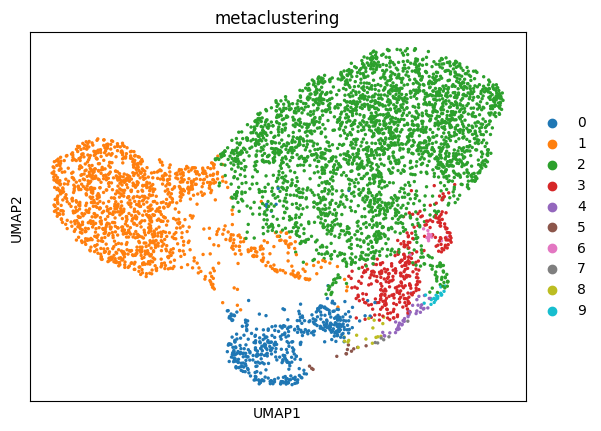

In [36]:
# By metaclustering
subset_fsom.obs["metaclustering"] = subset_fsom.obs["metaclustering"].astype(str)
sc.pl.umap(subset_fsom, color="metaclustering")